In [1]:
import pickle as pk
import matplotlib.pyplot as plt
import tensorflow as tf
from cnn import CNN
import numpy as np
model_filepath="../models/vanilla"
model = tf.keras.models.load_model(model_filepath, custom_objects={"loss": CNN.loss})

2023-05-02 16:20:25.318822: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-02 16:20:25.396417: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-02 16:20:25.397327: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-02 16:20:26.582017: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


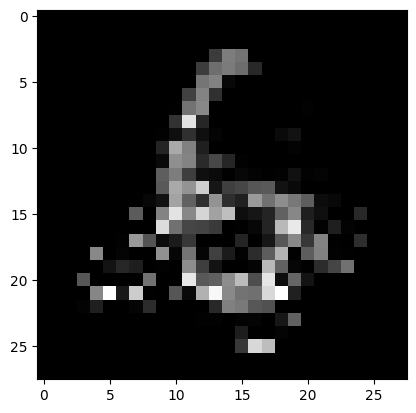

In [2]:
input_filepath="../data/l2attack.pk"
output_filepath="../fig/l2attack.png"
with open(input_filepath, "rb") as fd:
    xp = pk.load(fd)
xp = tf.reshape(xp, [1, 28, 28, 1])
plt.imshow(xp[0], cmap='gray')
plt.show()

6


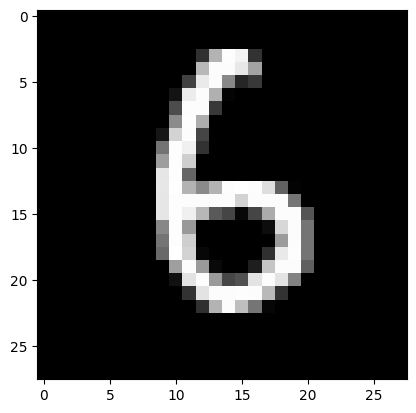

In [3]:
index = 21
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = (x_train / 255) - 0.5
x_train = np.reshape(x_train, (-1, 28, 28, 1))
x_test = (x_test / 255) - 0.5
x_test = np.reshape(x_test, (-1, 28, 28, 1))
print(y_test[index])
plt.imshow(x_test[index], cmap='gray')
plt.show()

In [4]:
pred = model.predict(x_test)
pred = tf.nn.softmax(pred, axis=1)
pred = np.argmax(pred, axis=1)
print(f"pred {pred}")
print(f"truth {y_test}")

313/313 [==============================] - 2s 6ms/step
pred [7 2 1 ... 4 5 6]
truth [7 2 1 ... 4 5 6]


In [5]:
pred = model.predict(xp)
pred = tf.nn.softmax(pred, axis=1)
pred = np.argmax(pred, axis=1)
print(f"pred {pred}")

1/1 [==============================] - 0s 17ms/step
pred [3]


In [ ]:
# write code that creates a plot with original image and the adversarial image with thesamemisclassifiedlabelofl+1(mod10).